# Submission for SGH by ZACHARY LIM (malaria_death)

## Packages i am using for this assignment

In [6]:
# SQL packages
import sqlite3

#Python packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os




## Extracting and reading data

Using the variable mal_dea to extract out the dataset from malaria_deaths.csv using read_csv().  We then check if there are any NaN values . If they have, we replace it with the Entity code to keep the data values non-empty. We also use describe() to see if there are any further information we can gather.

In [7]:
mal_dea = pd.read_csv("malaria_deaths.csv",index_col=False)
count_nan_in_df = mal_dea.isnull().sum()
print (count_nan_in_df)
mal_dea['Code'] = mal_dea['Code'].fillna(mal_dea['Entity'])
mal_dea

Entity                                                                                0
Code                                                                                864
Year                                                                                  0
Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)      0
dtype: int64


,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472
...,...,...,...,...
6151,Zimbabwe,ZWE,2012,9.751727
6152,Zimbabwe,ZWE,2013,9.419939
6153,Zimbabwe,ZWE,2014,9.487453
6154,Zimbabwe,ZWE,2015,9.440046


In [8]:
mal_dea.describe() 

,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
count,6156.000000,6156.000000
mean,2003.000000,16.375074
std,7.789514,38.606219
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.020219
75%,2010.000000,3.891035
max,2016.000000,229.228881


## Preparing the dataset to be store into SQL

Using module pivot, i changes the dataset into a table that can be more manageable to handle from the database.

In [9]:
col_name = list(mal_dea) #['Entity','Code','Year','Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)']
new_mal_dea = mal_dea.pivot(index=col_name[0:2], columns=col_name[2], values = col_name[3]).reset_index().rename_axis() 
new_col_name = list(new_mal_dea)
new_mal_dea


Year,Entity,Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,6.802930,6.973494,6.989882,7.088983,7.392472,7.405511,7.626773,7.592172,...,8.266378,8.077900,7.817882,7.271249,6.826629,6.611425,7.144628,7.137835,7.192283,7.139429
1,Albania,ALB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Algeria,DZA,0.027130,0.027024,0.026476,0.026566,0.026699,0.026151,0.026465,0.026657,...,0.024676,0.023874,0.023513,0.022629,0.022393,0.022439,0.021616,0.021732,0.021629,0.021669
3,American Samoa,ASM,0.325525,0.327410,0.322589,0.311008,0.304775,0.300823,0.297561,0.293052,...,0.219236,0.212173,0.212929,0.212127,0.211896,0.209409,0.208585,0.208029,0.207377,0.206802
4,Andean Latin America,Andean Latin America,0.353560,0.349772,0.343963,0.336221,0.315883,0.296842,0.276172,0.252839,...,0.065673,0.061670,0.058725,0.056535,0.054469,0.052504,0.050781,0.049110,0.048125,0.047643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Western Sub-Saharan Africa,Western Sub-Saharan Africa,118.937107,121.853695,122.354906,124.228419,124.755508,125.163053,125.938997,125.460808,...,133.841799,132.979373,123.956903,116.191974,108.713736,101.778544,96.855639,93.419458,90.011194,87.537183
224,World,OWID_WRL,11.991974,12.304085,12.462722,12.743795,12.951607,13.194757,13.424123,13.598440,...,14.399868,14.097223,13.383327,12.730621,11.970381,11.188480,10.821723,10.542756,10.234017,10.203551
225,Yemen,YEM,0.044844,0.044288,0.044888,0.043624,0.045884,0.046014,0.045758,0.046140,...,0.037424,0.036319,0.035678,0.035533,0.034915,0.033680,0.033717,0.033917,0.033254,0.032792
226,Zambia,ZMB,62.703584,65.698157,66.892397,67.453156,67.613980,67.887307,67.363135,66.552197,...,33.994572,26.347912,26.477822,26.929733,23.445787,25.170050,31.841815,32.342745,30.273699,29.473210


## Saving malaria_death into SQL 

We create a database file call "mal_dea.db" that will store the dataset inside. If the file does not exist, the file is created and the data is being stored inside. If it does exist, it wll just connect and run.

In [10]:
# Create a SQL connection to our SQLite3 database


my_path = "mal_dea.db"

if not os.path.isfile(my_path):
    con = sqlite3.connect(my_path)
    cur = con.cursor()
    new_mal_dea.to_sql('malaria_deaths', con=sqlite3.connect(my_path))
    
    print("db file has been created and is connected successfully")

else:
    con = sqlite3.connect(my_path)
    cur = con.cursor()
    print("db file has already been created and is now connected successfully")



db file has been created and is connected successfully


This step is to see whether the database exist or not

In [11]:
cur.execute("SELECT * FROM sqlite_master WHERE type = 'table';")
print(cur.fetchall())

[('table', 'malaria_deaths', 'malaria_deaths', 2, 'CREATE TABLE "malaria_deaths" (\n"index" INTEGER,\n  "Entity" TEXT,\n  "Code" TEXT,\n  "1990" REAL,\n  "1991" REAL,\n  "1992" REAL,\n  "1993" REAL,\n  "1994" REAL,\n  "1995" REAL,\n  "1996" REAL,\n  "1997" REAL,\n  "1998" REAL,\n  "1999" REAL,\n  "2000" REAL,\n  "2001" REAL,\n  "2002" REAL,\n  "2003" REAL,\n  "2004" REAL,\n  "2005" REAL,\n  "2006" REAL,\n  "2007" REAL,\n  "2008" REAL,\n  "2009" REAL,\n  "2010" REAL,\n  "2011" REAL,\n  "2012" REAL,\n  "2013" REAL,\n  "2014" REAL,\n  "2015" REAL,\n  "2016" REAL\n)')]


## Extracting certain countries to do the data visualization

We will extract the ASEAN countries to do the data visualization. The ASEAN countries involved are Brunei, Cambodia, Indonesia, Laos, Malaysia, Myanmar, the Philippines, Singapore, Thailand, and Vietnam.

We will then modify the dataset to ensure the year are in the index columns and the countries names are in the column names when visualizing data.

In [12]:
#Countries for ASEAN: Brunei, Cambodia, Indonesia, Laos, Malaysia, Myanmar, the Philippines, Singapore, Thailand, and Vietnam


asean_df = pd.read_sql("SELECT * FROM malaria_deaths WHERE Entity in ('Brunei','Cambodia','Indonesia', 'Laos','Malaysia', 'Myanmar','Philippines','Singapore','Thailand','Vietnam')",con)

asean_df= asean_df.drop(columns=['index'])
asean_df_trans = asean_df.T
asean_df_trans.columns = asean_df_trans.iloc[0]
asean_df_trans = asean_df_trans[2:]
asean_df_trans

Entity,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
1990,0.0,31.392404,6.357563,0.641471,0.193993,19.157216,1.741705,0.0,1.194205,1.753328
1991,0.0,30.065096,6.338066,0.621362,0.173808,19.314233,1.596167,0.0,1.192696,1.693152
1992,0.0,27.94226,6.079283,0.644512,0.159219,19.2216,1.393698,0.0,1.162327,1.681488
1993,0.0,27.17161,5.849203,0.622302,0.143059,19.184662,1.256653,0.0,1.18357,1.658324
1994,0.0,25.240029,5.892859,0.639097,0.127301,18.980091,1.065208,0.0,1.181163,1.652192
1995,0.0,24.207925,5.55311,0.600039,0.112431,18.748981,0.911262,0.0,1.181301,1.612268
1996,0.0,22.965276,5.476757,0.639074,0.103464,18.778692,0.747717,0.0,1.183524,1.631311
1997,0.0,22.862059,5.873552,0.602597,0.095788,18.7108,0.630771,0.0,1.099622,1.616211
1998,0.0,20.971382,5.250008,0.574686,0.090432,19.07328,0.539737,0.0,1.023824,1.548047
1999,0.0,20.907215,4.742639,0.525133,0.088318,19.567742,0.480263,0.0,0.800922,1.536626


## Data Visualization


Text(0, 0.5, 'Age-standardized (Rate) (per 100,000 people)')

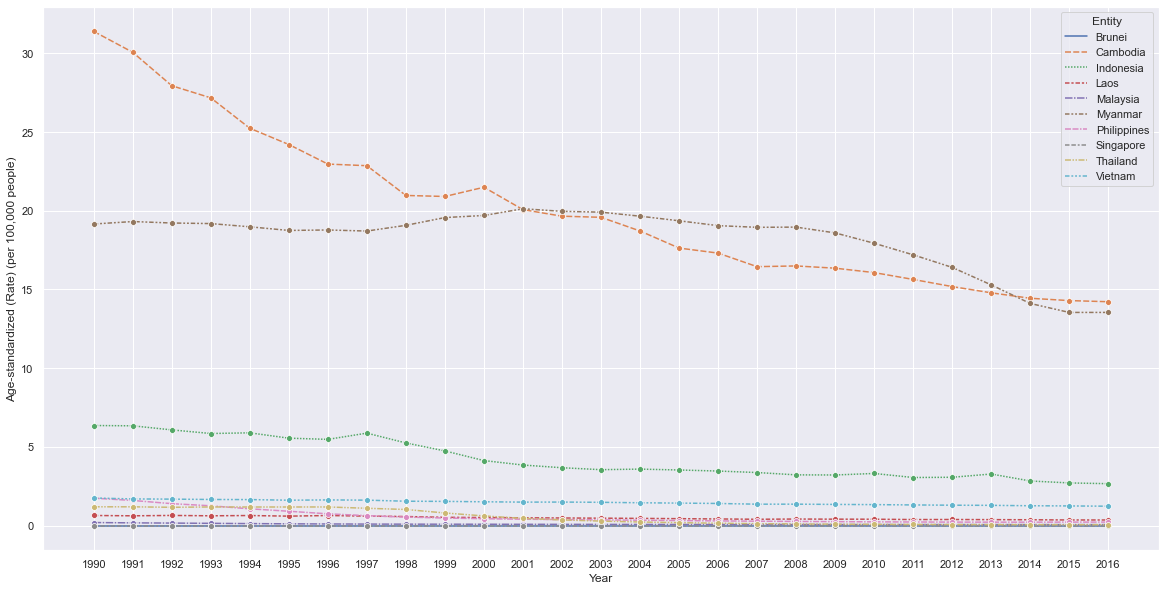

In [13]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data = asean_df_trans, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Age-standardized (Rate) (per 100,000 people)")

## Trying out if using all countries

In [14]:
overall_df = pd.read_sql("SELECT * FROM malaria_deaths",con)
overall_df= overall_df.drop(columns=['index'])
overall_df_trans = overall_df.T
overall_df_trans.columns = overall_df_trans.iloc[0] #grab the first row for the header
overall_df_trans = overall_df_trans[2:]
overall_df_trans

Entity,Afghanistan,Albania,Algeria,American Samoa,Andean Latin America,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Wales,Western Europe,Western Sub-Saharan Africa,World,Yemen,Zambia,Zimbabwe
1990,6.80293,0.0,0.02713,0.325525,0.35356,0.0,18.691207,0.0,0.030806,0.035989,...,51.925516,0.161501,1.753328,0.0,0.0,118.937107,11.991974,0.044844,62.703584,5.318481
1991,6.973494,0.0,0.027024,0.32741,0.349772,0.0,19.143211,0.0,0.02878,0.035382,...,41.715832,0.16629,1.693152,0.0,0.0,121.853695,12.304085,0.044288,65.698157,4.82965
1992,6.989882,0.0,0.026476,0.322589,0.343963,0.0,19.323137,0.0,0.027253,0.037053,...,30.371214,0.169355,1.681488,0.0,0.0,122.354906,12.462722,0.044888,66.892397,4.88153
1993,7.088983,0.0,0.026566,0.311008,0.336221,0.0,20.144111,0.0,0.02535,0.036795,...,22.122632,0.169767,1.658324,0.0,0.0,124.228419,12.743795,0.043624,67.453156,4.894753
1994,7.392472,0.0,0.026699,0.304775,0.315883,0.0,21.05879,0.0,0.023625,0.034154,...,17.202558,0.171131,1.652192,0.0,0.0,124.755508,12.951607,0.045884,67.61398,4.791996
1995,7.405511,0.0,0.026151,0.300823,0.296842,0.0,22.047514,0.0,0.022181,0.030295,...,16.272144,0.166217,1.612268,0.0,0.0,125.163053,13.194757,0.046014,67.887307,5.001814
1996,7.626773,0.0,0.026465,0.297561,0.276172,0.0,22.810312,0.0,0.020987,0.027778,...,17.317688,0.158098,1.631311,0.0,0.0,125.938997,13.424123,0.045758,67.363135,5.064547
1997,7.592172,0.0,0.026657,0.293052,0.252839,0.0,24.178357,0.0,0.019631,0.024902,...,22.502118,0.146448,1.616211,0.0,0.0,125.460808,13.59844,0.04614,66.552197,5.195086
1998,7.796014,0.0,0.027148,0.282703,0.234817,0.0,27.507236,0.0,0.018529,0.022568,...,17.654162,0.139076,1.548047,0.0,0.0,127.298922,13.962049,0.056639,67.81872,5.289983
1999,7.800592,0.0,0.026817,0.271412,0.20029,0.0,29.926538,0.0,0.017479,0.020964,...,12.329495,0.125222,1.536626,0.0,0.0,127.68213,14.271505,0.047364,69.042075,6.101695


Text(0, 0.5, 'Age-standardized (Rate) (per 100,000 people)')

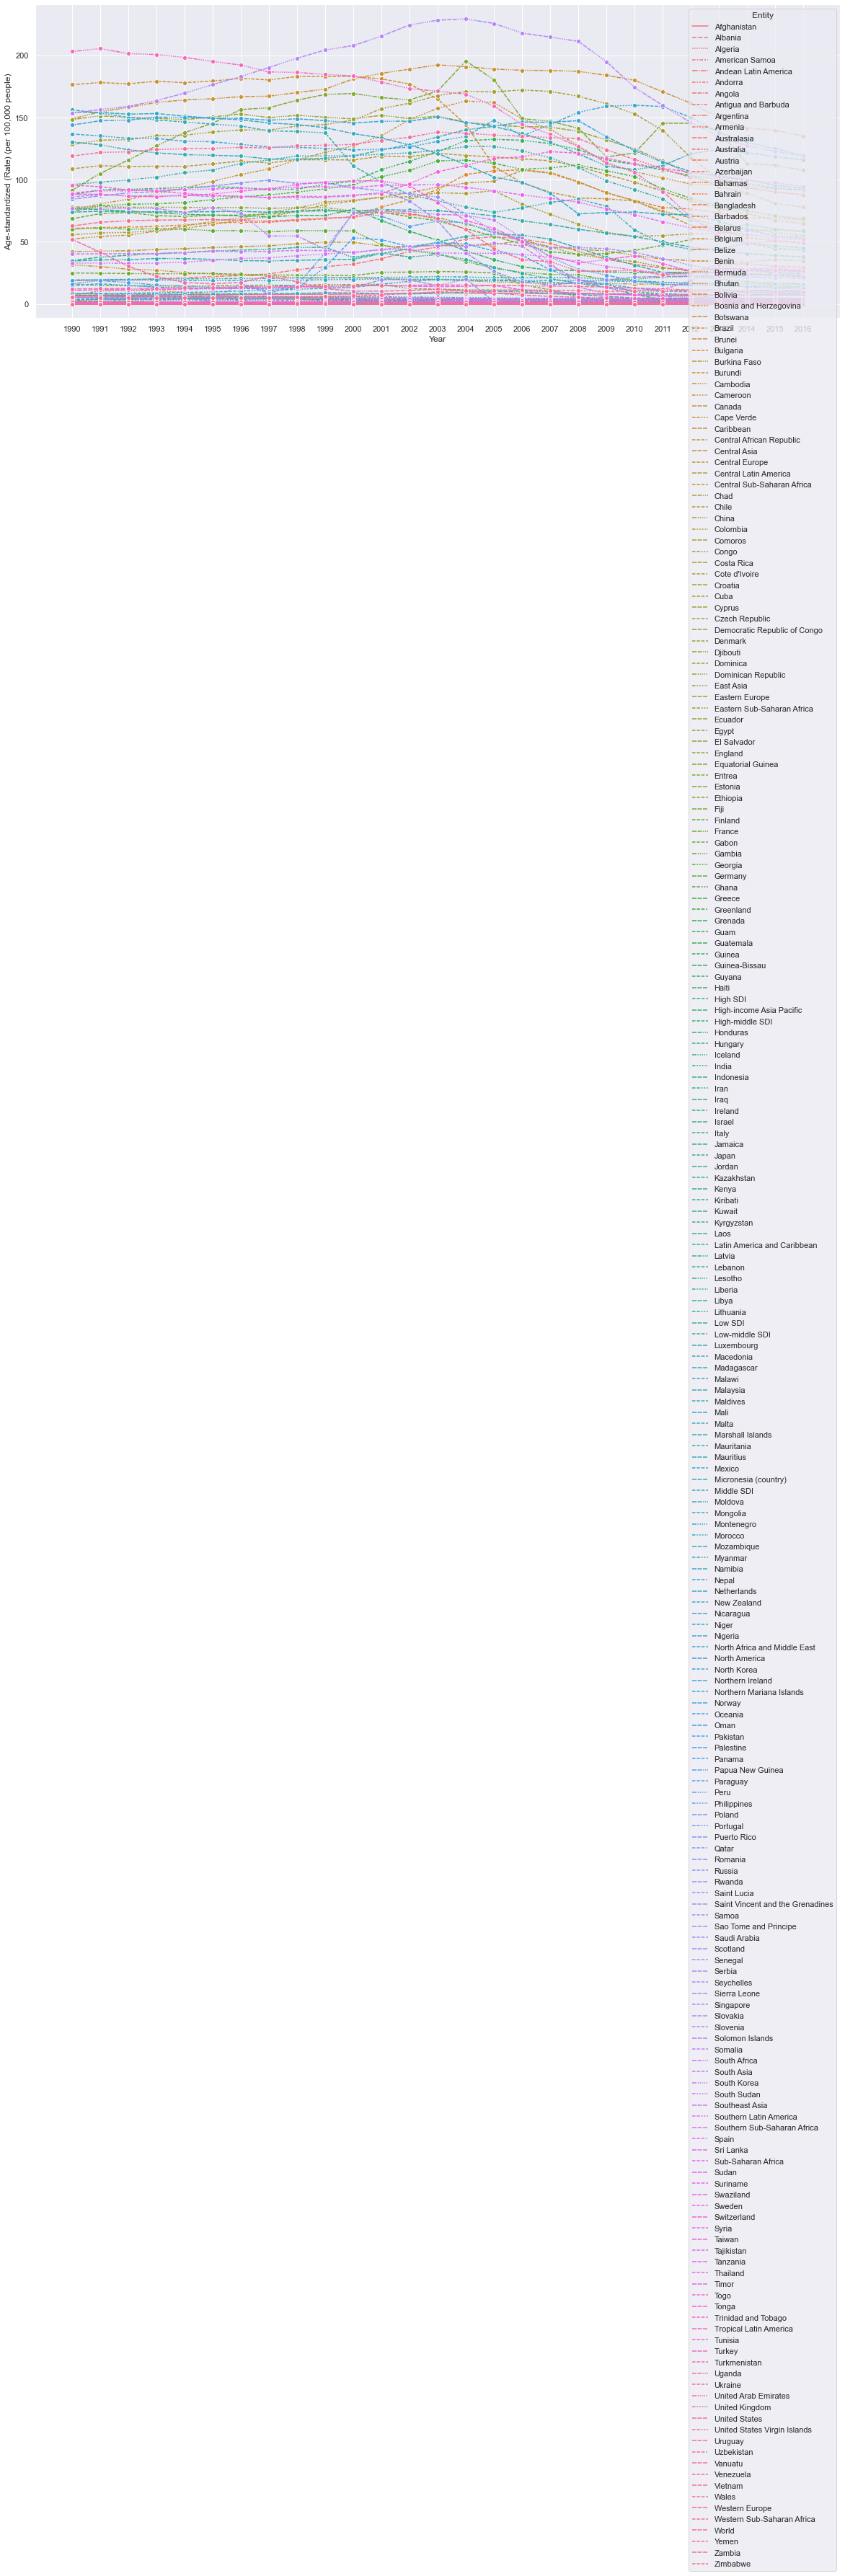

In [16]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.lineplot(data = overall_df_trans, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Age-standardized (Rate) (per 100,000 people)")

## Closing Programs

closing programs that we are done using

In [17]:
con.close()